# EMOTIONS NLP CLASSIFICATION — TRAINING

**Autor:** Paul Park (A01709885)  
**Fecha:** 9 de noviembre de 2025  
**Objetivo:**
Entrenar y evaluar un modelo de Deep Learning (LSTM bidireccional) para la clasificación de emociones en texto. Se comparan un modelo base y una versión mejorada con técnicas de regularización.

In [8]:
# --- 1. Descarga de datos ---
!rm -rf train.txt val.txt test.txt
!wget -O train.txt https://raw.githubusercontent.com/PaulPark2022/Emotions-NLP-Classification-A01709885/main/train.txt
!wget -O val.txt https://raw.githubusercontent.com/PaulPark2022/Emotions-NLP-Classification-A01709885/main/val.txt
!wget -O test.txt https://raw.githubusercontent.com/PaulPark2022/Emotions-NLP-Classification-A01709885/main/test.txt

--2025-11-10 05:20:01--  https://raw.githubusercontent.com/PaulPark2022/Emotions-NLP-Classification-A01709885/main/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  --.-KB/s    in 0.05s   

2025-11-10 05:20:02 (29.1 MB/s) - ‘train.txt’ saved [1658616/1658616]

--2025-11-10 05:20:02--  https://raw.githubusercontent.com/PaulPark2022/Emotions-NLP-Classification-A01709885/main/val.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

In [9]:
# --- 2. Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [10]:
# --- 3. Carga de datos ---
def load_txt(path):
    """Lee archivo .txt con formato texto;etiqueta"""
    texts, labels = [], []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            text, label = line.strip().split(';')
            texts.append(text)
            labels.append(label)
    return texts, labels

train_texts, train_labels = load_txt('train.txt')
val_texts, val_labels = load_txt('val.txt')
test_texts, test_labels = load_txt('test.txt')

In [11]:
# --- 4. Preprocesamiento ---
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
val_labels_enc = le.transform(val_labels)
test_labels_enc = le.transform(test_labels)

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)

train_seq = tokenizer.texts_to_sequences(train_texts)
val_seq = tokenizer.texts_to_sequences(val_texts)
test_seq = tokenizer.texts_to_sequences(test_texts)

max_len = 50
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
val_pad = pad_sequences(val_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

num_classes = len(le.classes_)

Entrenando modelo base...
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.3920 - loss: 1.5032 - val_accuracy: 0.7365 - val_loss: 0.7624
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8380 - loss: 0.5068 - val_accuracy: 0.8885 - val_loss: 0.3353
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.9372 - loss: 0.2050 - val_accuracy: 0.9040 - val_loss: 0.2994
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9540 - loss: 0.1433 - val_accuracy: 0.8985 - val_loss: 0.3105
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9702 - loss: 0.0953 - val_accuracy: 0.9125 - val_loss: 0.3130
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8999 - loss: 0.3020

✅ Accuracy del modelo base: 0.90


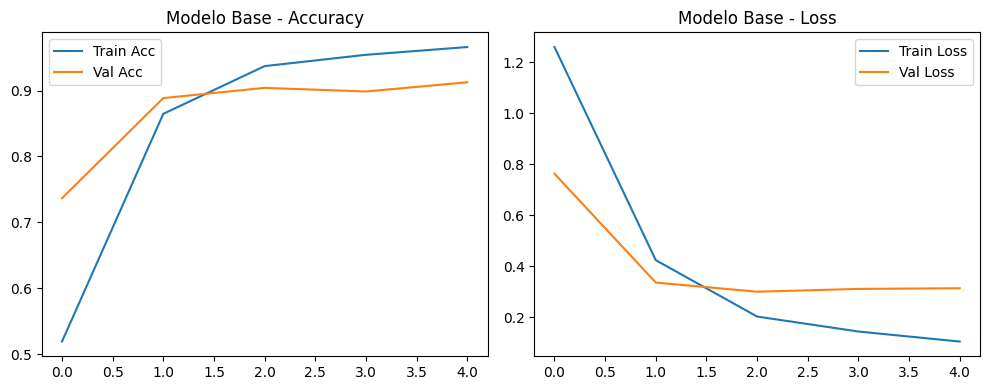

In [12]:
# --- 5. MODELO BASE ---
# Arquitectura más simple: embedding + LSTM(64) + dropout
print("Entrenando modelo base...")
model_base = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=10000, output_dim=64),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_base.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_base = model_base.fit(
    train_pad, train_labels_enc,
    validation_data=(val_pad, val_labels_enc),
    epochs=5,
    batch_size=32,
    verbose=1
)

loss_base, acc_base = model_base.evaluate(test_pad, test_labels_enc)
print(f"\n✅ Accuracy del modelo base: {acc_base:.2f}")

# --- 5.1 Resultados modelo base ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_base.history['accuracy'], label='Train Acc')
plt.plot(history_base.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Modelo Base - Accuracy")

plt.subplot(1,2,2)
plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Modelo Base - Loss")
plt.tight_layout()
plt.show()


Entrenando modelo mejorado...
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.3950 - loss: 1.4983 - val_accuracy: 0.7460 - val_loss: 0.6975
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 156ms/step - accuracy: 0.8075 - loss: 0.5456 - val_accuracy: 0.8875 - val_loss: 0.3140
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 154ms/step - accuracy: 0.9179 - loss: 0.2435 - val_accuracy: 0.9150 - val_loss: 0.2661
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 154ms/step - accuracy: 0.9503 - loss: 0.1539 - val_accuracy: 0.9045 - val_loss: 0.2828
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 153ms/step - accuracy: 0.9516 - loss: 0.1487 - val_accuracy: 0.9100 - val_loss: 0.2963
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9156 - loss: 0.2442

✅ Accuracy del modelo mejorado: 0.91


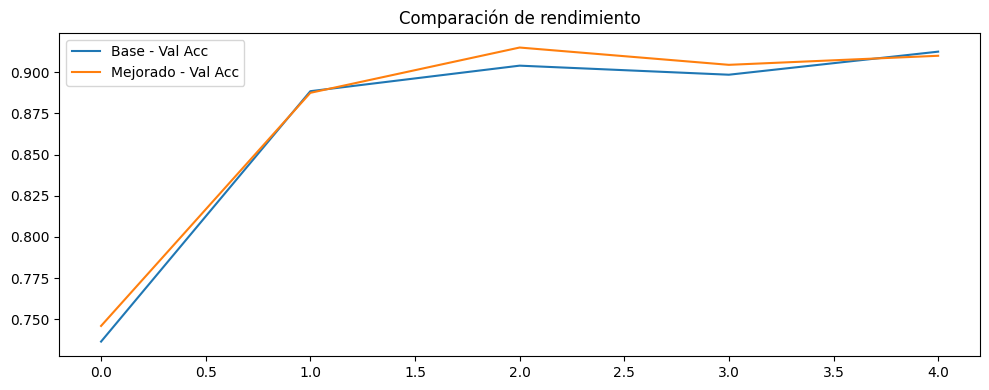

In [13]:
# --- 6. MODELO MEJORADO ---
# Cambios: embedding (128), LSTM(128), + capa densa intermedia, mayor dropout y EarlyStopping
print("\nEntrenando modelo mejorado...")
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.6),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_pad, train_labels_enc,
    validation_data=(val_pad, val_labels_enc),
    epochs=10,
    batch_size=32,
    callbacks=[es]
)

loss, acc = model.evaluate(test_pad, test_labels_enc)
print(f"\n✅ Accuracy del modelo mejorado: {acc:.2f}")

# --- 6.1 Comparativa visual ---
plt.figure(figsize=(10,4))
plt.plot(history_base.history['val_accuracy'], label='Base - Val Acc')
plt.plot(history.history['val_accuracy'], label='Mejorado - Val Acc')
plt.title("Comparación de rendimiento")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# --- 7. GUARDADO DEL MODELO Y OBJETOS AUXILIARES ---
model.save('emotion_model.keras')
with open('tokenizer.pkl', 'wb') as f: pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f: pickle.dump(le, f)

print("\n✅ Modelo y objetos auxiliares guardados exitosamente en formato .keras")


✅ Modelo y objetos auxiliares guardados exitosamente en formato .keras
